In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import missingno as msno
import seaborn as sns

In [2]:
# Load ourworldindata's dataset
df_raw_owid = pd.read_csv('dataset/owid/owid-co2-data.csv')
df_raw_owid.head(3)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN


In [3]:
# Load worldbank's dataset
df_raw_worldbank = pd.read_csv('dataset/worldbank/API.csv')
df_raw_worldbank.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.70000,...,42.940000,42.957000,42.990000,43.041000,43.10800,43.192000,43.293000,43.41100,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.00000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.00000,45293.000000,45614.000000,45949.00000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.54481,...,0.100461,0.543931,0.660561,0.707733,0.69609,0.697901,0.706219,0.73174,0.748028,0.774631


## Discover Missing Values

Using [missingno](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

<AxesSubplot:>

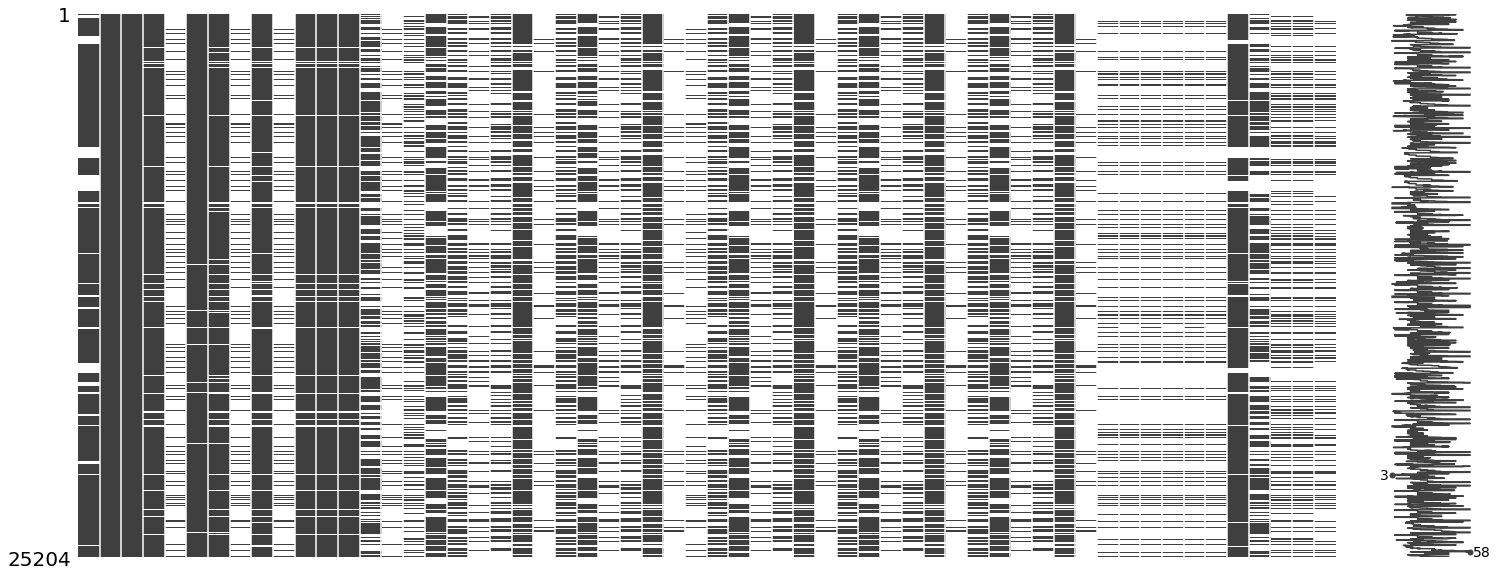

In [7]:
# Starting from ourwordindata

# Visualize missing values as a matrix
msno.matrix(df_raw_owid)

<AxesSubplot:>

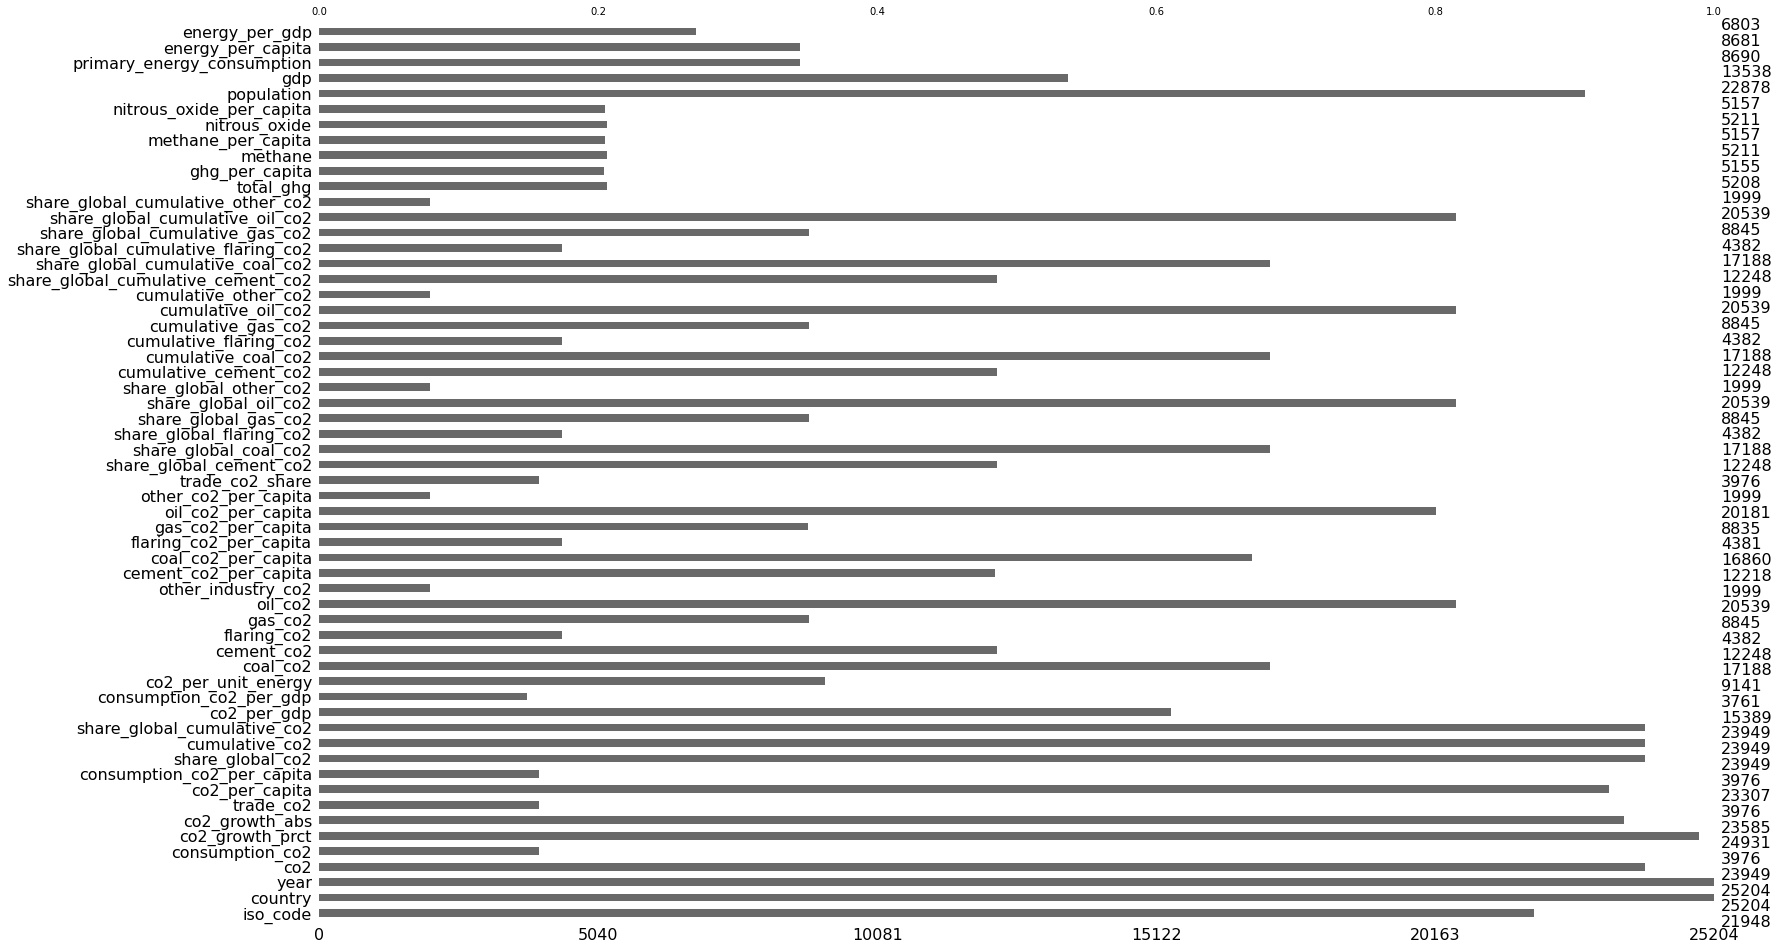

In [8]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df_raw_owid)

#### Missing Value Heatmaps
A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

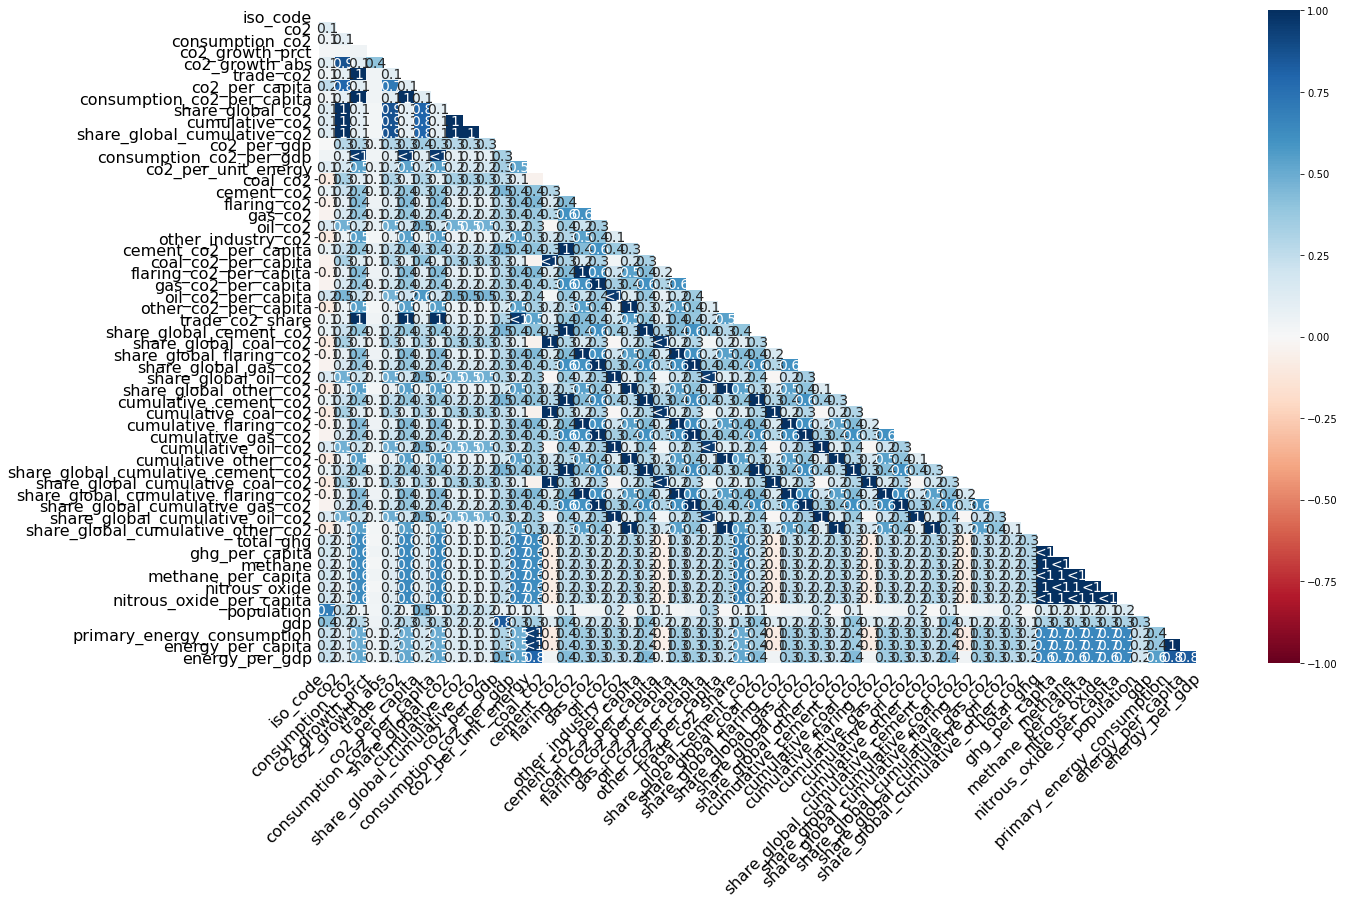

In [9]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df_raw_owid)

<AxesSubplot:>

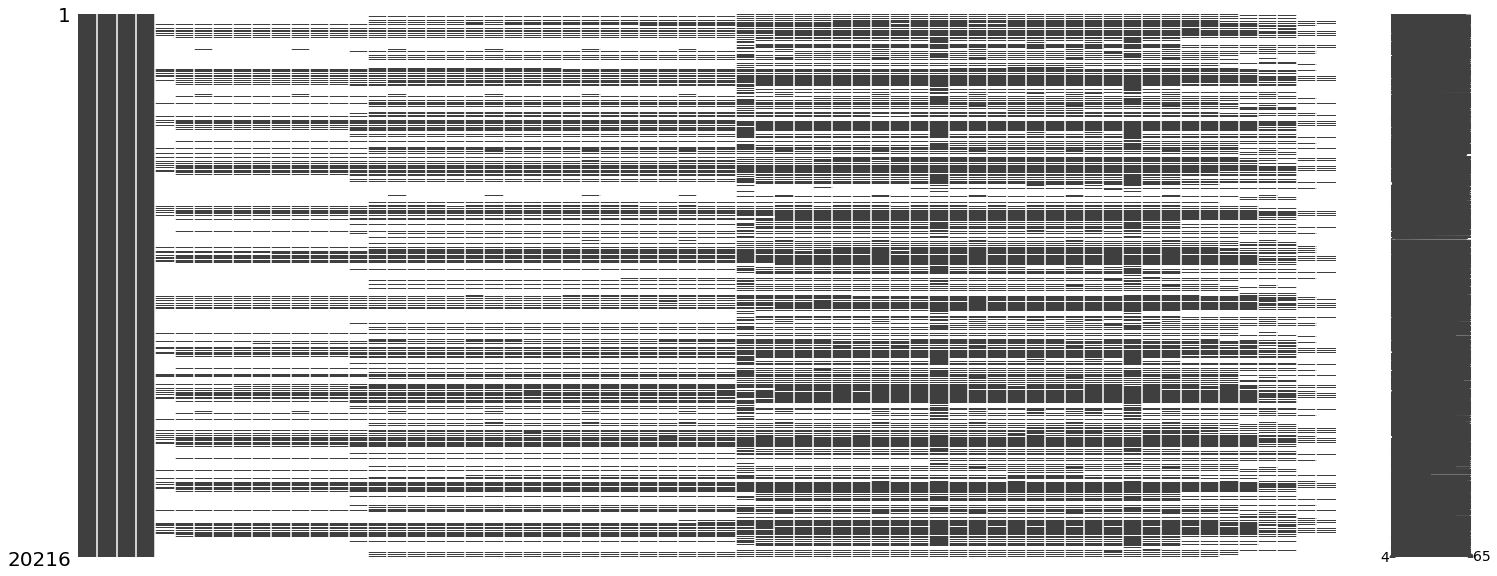

In [10]:
# Next, worldank's dataset

# Visualize missing values as a matrix
msno.matrix(df_raw_worldbank)

<AxesSubplot:>

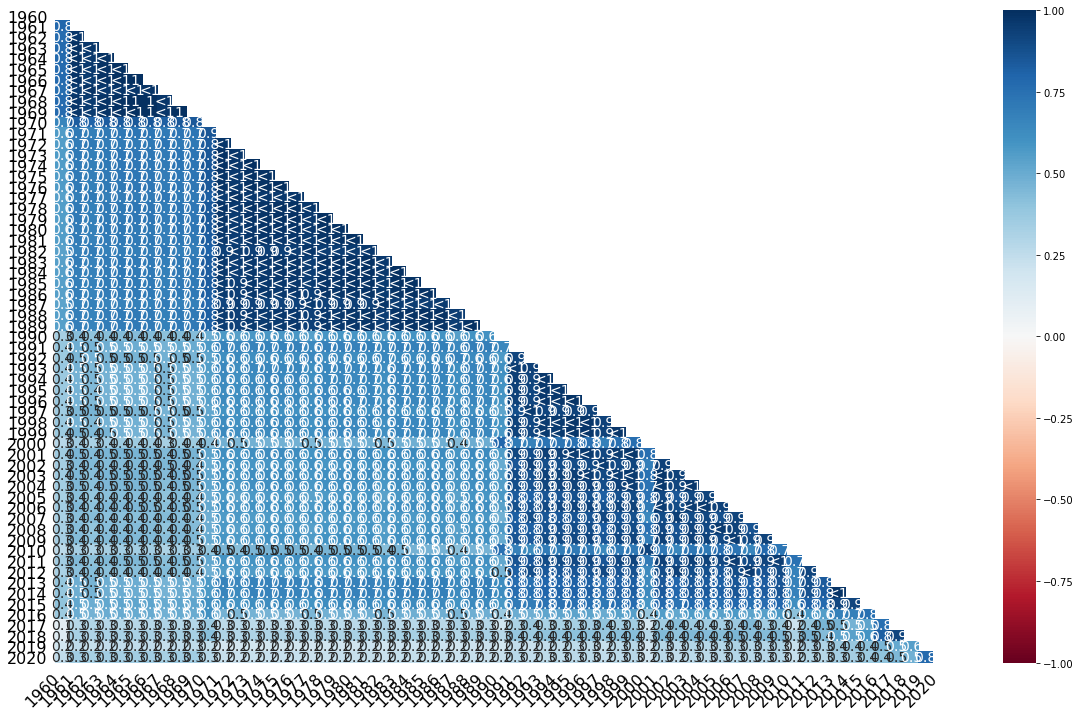

In [11]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df_raw_worldbank)

# Understanding dataset

# Understanding dataset

## Our World In Data

### Dimensions

iso_code	
country	
year	

### Measurements

<span style="color:blue">co2	
consumption_co2	(production_based_co2 - export + import) <br>
co2_growth_prct	
co2_growth_abs	
trade_co2	
co2_per_capita	
consumption_co2_per_capita </span>	

share_global_co2	
cumulative_co2	
share_global_cumulative_co2	
co2_per_gdp	
consumption_co2_per_gdp	
co2_per_unit_energy	

coal_co2	
cement_co2	
flaring_co2	
gas_co2	oil_co2	
other_industry_co2	

cement_co2_per_capita	
coal_co2_per_capita	
flaring_co2_per_capita	
gas_co2_per_capita	
oil_co2_per_capita	
other_co2_per_capita	

trade_co2_share	

share_global_cement_co2	
share_global_coal_co2	
share_global_flaring_co2	
share_global_gas_co2	
share_global_oil_co2	
share_global_other_co2

cumulative_cement_co2	
cumulative_coal_co2	
cumulative_flaring_co2	
cumulative_gas_co2	
cumulative_oil_co2	
cumulative_other_co2

share_global_cumulative_cement_co2	
share_global_cumulative_coal_co2	
share_global_cumulative_flaring_co2	
share_global_cumulative_gas_co2	
share_global_cumulative_oil_co2	
share_global_cumulative_other_co2

<span style="color:blue">total_ghg</span> (green house gases) <br>
ghg_per_capita	

methane	
methane_per_capita	

nitrous_oxide	
nitrous_oxide_per_capita	

population	

gdp	

primary_energy_consumption	
energy_per_capita	
energy_per_gdp

### Additional info

1. Detailed description is available inside owid-co2-codebook.csv
2. [Consumption_co2 vs production based co2](https://ourworldindata.org/global-inequalities-co2-consumption) 

## Worldbank 

### Population
- Urban population (% of total population) 
- Urban population 
- Urban population growth (annual %)
- Population, total 
- Population growth (annual %) 

### Economics, social sector, policy
- Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
- Prevalence of underweight, weight for age (% of children under 5)
- Community health workers (per 1,000 people)
- Mortality rate, under-5 (per 1,000 live births)
- Primary completion rate, total (% of relevant age group)
- School enrollment, primary and secondary (gross), gender parity index (GPI)
- Agriculture, forestry, and fishing, value added (% of GDP)
- [CPIA](https://www.worldbank.org/en/data/datatopics/cpia/cluster/overall-cpia-score) public sector management and - institutions cluster average (1=low to 6=high)
- Ease of doing business rank (1=most business-friendly regulations)

### Environment
- Terrestrial and marine protected areas (% of total territorial area)
- Marine protected areas (% of territorial waters)
- Terrestrial protected areas (% of total land area)
- Annual freshwater withdrawals, total (% of internal resources)
- Annual freshwater withdrawals, total (billion cubic meters)
- Population in urban agglomerations of more than 1 million (% of total population)
- Population living in areas where elevation is below 5 meters (% of total population)
- Urban population living in areas where elevation is below 5 meters (% of total population)
- Rural population living in areas where elevation is below 5 meters (% of total population)
- Droughts, floods, extreme temperatures (% of population, average 1990-2009)
- Disaster risk reduction progress score (1-5 scale; 5=best)

### <span style="color:blue">Emission</span>
- GHG net emissions/removals by LUCF (Mt of CO2 equivalent)
- SF6 gas emissions (thousand metric tons of CO2 equivalent)
- PFC gas emissions (thousand metric tons of CO2 equivalent)
- Nitrous oxide emissions (% change from 1990)
- Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
- Methane emissions (% change from 1990)
- Methane emissions (kt of CO2 equivalent)
- HFC gas emissions (thousand metric tons of CO2 equivalent)
- Total greenhouse gas emissions (% change from 1990)
- Total greenhouse gas emissions (kt of CO2 equivalent)
- Other greenhouse gas emissions (% change from 1990)
- Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
- CO2 emissions from solid fuel consumption (% of total)
- CO2 emissions from solid fuel consumption (kt) 
- CO2 emissions (kg per 2017 PPP \$ of GDP)
- CO2 emissions (kg per PPP \$ of GDP)
- CO2 emissions (metric tons per capita)
- CO2 emissions from liquid fuel consumption (% of total) 
- CO2 emissions from liquid fuel consumption (kt) 
- CO2 emissions (kt)
- CO2 emissions (kg per 2015 US$ of GDP)
- CO2 emissions from gaseous fuel consumption (% of total) 
- CO2 emissions from gaseous fuel consumption (kt) 
- CO2 intensity (kg per kg of oil equivalent energy use)

### Energy
- Energy use (kg of oil equivalent per capita)
- Electric power consumption (kWh per capita)
- Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)
- Renewable energy consumption (% of total final energy consumption)
- Electricity production from renewable sources, excluding hydroelectric (% of total)
- Electricity production from renewable sources, excluding hydroelectric (kWh)
- Renewable electricity output (% of total electricity output)
- Electricity production from oil sources (% of total)
- Electricity production from nuclear sources (% of total)
- Electricity production from natural gas sources (% of total)
- Electricity production from hydroelectric sources (% of total)
- Electricity production from coal sources (% of total)
- Access to electricity (% of population)

### Foreign
- Foreign direct investment, net inflows (% of GDP)

### Agriculture
- Cereal yield (kg per hectare)
- Average precipitation in depth (mm per year)
- Agricultural irrigated land (% of total agricultural land)

### Land
- Forest area (% of land area)
- Forest area (sq. km)
- Land area where elevation is below 5 meters (% of total land area)
- Urban land area where elevation is below 5 meters (% of total land area)
- Urban land area where elevation is below 5 meters (sq. km)
- Rural land area where elevation is below 5 meters (% of total land area)
- Rural land area where elevation is below 5 meters (sq. km)
- Arable land (% of land area)
- Agricultural land (% of land area)
- Agricultural land (sq. km)

## Worldbank 

### Population
- Urban population (% of total population) 
- Urban population 
- Urban population growth (annual %)
- Population, total 
- Population growth (annual %) 

### Economics, social sector
- Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
- Prevalence of underweight, weight for age (% of children under 5)
- Community health workers (per 1,000 people)
- Mortality rate, under-5 (per 1,000 live births)
- Primary completion rate, total (% of relevant age group)
- School enrollment, primary and secondary (gross), gender parity index (GPI)
- Agriculture, forestry, and fishing, value added (% of GDP)
- [CPIA](https://www.worldbank.org/en/data/datatopics/cpia/cluster/overall-cpia-score) public sector management and - institutions cluster average (1=low to 6=high)
- Ease of doing business rank (1=most business-friendly regulations)

### Environment
- Terrestrial and marine protected areas (% of total territorial area)
- Marine protected areas (% of territorial waters)
- Terrestrial protected areas (% of total land area)
- Annual freshwater withdrawals, total (% of internal resources)
- Annual freshwater withdrawals, total (billion cubic meters)
- Population in urban agglomerations of more than 1 million (% of total population)
- Population living in areas where elevation is below 5 meters (% of total population)
- Urban population living in areas where elevation is below 5 meters (% of total population)
- Rural population living in areas where elevation is below 5 meters (% of total population)
- Droughts, floods, extreme temperatures (% of population, average 1990-2009)
- Disaster risk reduction progress score (1-5 scale; 5=best)

### Emission
- GHG net emissions/removals by LUCF (Mt of CO2 equivalent)
- SF6 gas emissions (thousand metric tons of CO2 equivalent)
- PFC gas emissions (thousand metric tons of CO2 equivalent)
- Nitrous oxide emissions (% change from 1990)
- Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
- Methane emissions (% change from 1990)
- Methane emissions (kt of CO2 equivalent)
- HFC gas emissions (thousand metric tons of CO2 equivalent)
- Total greenhouse gas emissions (% change from 1990)
- Total greenhouse gas emissions (kt of CO2 equivalent)
- Other greenhouse gas emissions (% change from 1990)
- Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
- CO2 emissions from solid fuel consumption (% of total)
- CO2 emissions from solid fuel consumption (kt) 
- CO2 emissions (kg per 2017 PPP \$ of GDP)
- CO2 emissions (kg per PPP \$ of GDP)
- CO2 emissions (metric tons per capita)
- CO2 emissions from liquid fuel consumption (% of total) 
- CO2 emissions from liquid fuel consumption (kt) 
- CO2 emissions (kt)
- CO2 emissions (kg per 2015 US$ of GDP)
- CO2 emissions from gaseous fuel consumption (% of total) 
- CO2 emissions from gaseous fuel consumption (kt) 
- CO2 intensity (kg per kg of oil equivalent energy use)

### Energy
- Energy use (kg of oil equivalent per capita)
- Electric power consumption (kWh per capita)
- Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)
- Renewable energy consumption (% of total final energy consumption)
- Electricity production from renewable sources, excluding hydroelectric (% of total)
- Electricity production from renewable sources, excluding hydroelectric (kWh)
- Renewable electricity output (% of total electricity output)
- Electricity production from oil sources (% of total)
- Electricity production from nuclear sources (% of total)
- Electricity production from natural gas sources (% of total)
- Electricity production from hydroelectric sources (% of total)
- Electricity production from coal sources (% of total)
- Access to electricity (% of population)

### Foreign
- Foreign direct investment, net inflows (% of GDP)

### Agriculture
- Cereal yield (kg per hectare)
- Average precipitation in depth (mm per year)
- Agricultural irrigated land (% of total agricultural land)

### Land
- Forest area (% of land area)
- Forest area (sq. km)
- Land area where elevation is below 5 meters (% of total land area)
- Urban land area where elevation is below 5 meters (% of total land area)
- Urban land area where elevation is below 5 meters (sq. km)
- Rural land area where elevation is below 5 meters (% of total land area)
- Rural land area where elevation is below 5 meters (sq. km)
- Arable land (% of land area)
- Agricultural land (% of land area)
- Agricultural land (sq. km)